In [1]:
%run ./'01 load.ipynb'

Last data for germany: 2020-03-29 13:59:09


In [2]:
country = 'Germany'

In [3]:
df = df[df['country'] == country]

In [4]:
df['growth'] = df['confirmed'].diff().fillna(0)

In [5]:
curr = df.tail(1)['date'].dt.strftime('%d. %b, %H:%M Uhr').values[0]

In [6]:
# Newest data
df.tail(10)

,date,date_string,country,confirmed,active,deaths,recovered,growth
4342,2020-03-20 23:59:59,20. Mar,Germany,"19,848",0,67,0,"4,528"
4343,2020-03-21 23:59:59,21. Mar,Germany,"22,213",0,84,0,"2,365"
4344,2020-03-22 23:59:59,22. Mar,Germany,"24,873",0,94,0,"2,660"
4345,2020-03-23 23:59:59,23. Mar,Germany,"29,056",0,123,0,"4,183"
4346,2020-03-24 23:59:59,24. Mar,Germany,"32,986",0,157,0,"3,930"
4347,2020-03-25 23:59:59,25. Mar,Germany,"37,323",0,206,0,"4,337"
4348,2020-03-26 23:59:59,26. Mar,Germany,"43,938",0,267,0,"6,615"
4349,2020-03-27 23:59:59,27. Mar,Germany,"50,871",0,342,0,"6,933"
4350,2020-03-28 23:59:59,28. Mar,Germany,"57,695",0,433,0,"6,824"
4351,2020-03-29 13:59:09,29. Mar,Germany,"58,247","49,311",455,"8,481",552


In [7]:
# Load predictions from 18th march
prediction = pd.read_csv('20200318 Predict Corona - Sheet1.csv')
prediction['predict'] = prediction['predict'].str.replace(',','').astype('str')
prediction['date'] = prediction['date'] + ' 23:59:59'
prediction['date'] = pd.to_datetime(prediction['date'])
prediction['date_string'] = prediction['date'].dt.strftime('%d. %b')

In [8]:
df = pd.merge(left=df, right=prediction[['date', 'predict']], on='date', how='left')

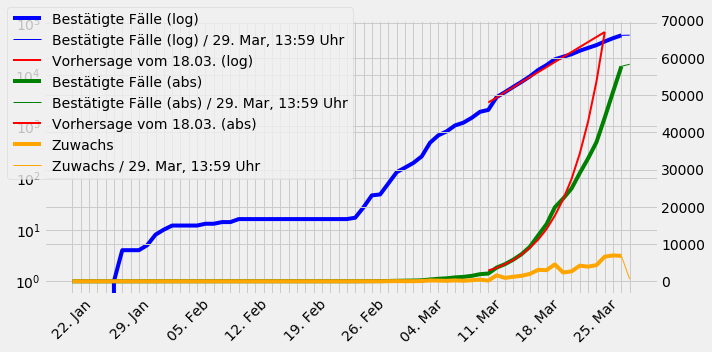

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,1,1)
ax1.grid(True)
ax1.set_yscale('log')
ax1.plot(df['date_string'][:-1], df['confirmed'][:-1], color = 'blue', linewidth=4)
ax1.plot(df['date_string'][-2:], df['confirmed'][-2:], color = 'blue', linewidth=1)
ax1.plot(df['date_string'], df['predict'], color = 'red', linewidth=2)
ax2 = ax1.twinx()
ax2.plot(df['date_string'][:-1], df['confirmed'][:-1], color = 'green', linewidth=4)
ax2.plot(df['date_string'][-2:], df['confirmed'][-2:], color = 'green', linewidth=1)
ax2.plot(df['date_string'], df['predict'], color = 'red', linewidth=2)
ax2.plot(df['date_string'][:-1], df['growth'][:-1], color = 'orange', linewidth=4)
ax2.plot(df['date_string'][-2:], df['growth'][-2:], color = 'orange', linewidth=1)
fig.legend([
    'Bestätigte Fälle (log)',
    'Bestätigte Fälle (log) / ' + curr,
    'Vorhersage vom 18.03. (log)',
    'Bestätigte Fälle (abs)',
    'Bestätigte Fälle (abs) / ' + curr,
    'Vorhersage vom 18.03. (abs)',
    'Zuwachs',
    'Zuwachs / ' + curr], loc='upper left')
ax1.set_xticklabels(labels=df['date_string'], rotation=45)
labels = ax1.xaxis.get_ticklabels()
for label in labels:
    label.set_visible(False)
for label in labels[::7]:
    label.set_visible(True)
fig.tight_layout()
fig.show()